In [1]:
!pip install tf-keras-vis matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/52.5 kB ? eta -:--:--
   ----------------------- ---------------- 30.7/52.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 52.5/52.5 kB 1.4 MB/s eta 0:00:00


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
# Load the prepared data
X = np.load('../data/12hrs/X_12hr.npy')
y = np.load('../data/12hrs/y_12hr.npy')


In [3]:
X.shape

(19489, 48, 52)

In [4]:
y.shape

(19489,)

In [5]:
count_ones = np.sum(y == 1)

count_zeros = np.sum(y == 0)

print(f"Number of 1s: {count_ones}")
print(f"Number of 0s: {count_zeros}")

Number of 1s: 7951
Number of 0s: 11538


In [6]:
X[0].shape

(48, 52)

In [7]:
X[0]

array([[-0.58757807, -0.83663026, -0.87412995, ..., -0.82377426,
        -0.84186686, -0.63521394],
       [-0.58757807, -0.83663026, -0.87412995, ..., -0.82377426,
        -0.84186686, -0.63521394],
       [-0.58757807, -0.83663026, -0.87412995, ..., -0.82377426,
        -0.84186686, -0.63521394],
       ...,
       [ 1.7019015 ,  1.29315507,  1.1122512 , ...,  0.99811556,
         1.0690281 ,  0.99275916],
       [ 1.7019015 ,  1.29315507,  1.1122512 , ...,  0.99811556,
         1.0690281 ,  1.26462889],
       [ 1.7019015 ,  1.29315507,  1.1122512 , ...,  1.85962935,
         1.0690281 ,  1.96022351]])

In [8]:
X[0][15]

array([-0.58757807, -0.83663026, -0.87412995, -0.82031106, -0.00669597,
       -0.00817735, -0.00252793, -0.04315573, -0.17805486, -0.13991747,
       -0.88200828, -0.87508743, -0.76989989, -0.87055823, -0.88142161,
       -0.78358441, -0.87038695, -0.88208305, -0.88220271, -0.86776175,
       -0.85036606, -0.86128536, -0.4234461 , -0.88080685, -0.8818527 ,
       -0.88166248, -0.88187548, -0.53180926, -0.88186461, -0.53819592,
       -0.87297825, -0.85484888, -0.87746256, -0.88193285, -0.88186433,
       -0.74685734, -0.87974692, -0.87776348, -0.8809766 , -0.880365  ,
       -0.87704713, -0.48722752, -0.83359775, -0.88140188, -0.02658927,
       -0.0189149 , -0.88125807, -0.83948636, -0.87836265, -0.82377426,
       -0.84186686, -0.63521394])

In [9]:
unique_values, counts = np.unique(y, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f'Value {value} occurs {count} times')

Value 0 occurs 11538 times
Value 1 occurs 7951 times


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, MultiHeadAttention, LayerNormalization, Add
from tensorflow.keras.optimizers import Adam

# Define the Transformer Encoder Layer using Keras' built-in MultiHeadAttention
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    # Multi-Head Attention
    attention = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    
    attention = Dropout(dropout)(attention)
    attention = Add()([attention, inputs])  # Residual connection
    attention = LayerNormalization(epsilon=1e-6)(attention)  # Layer normalization

    # Feed-forward network
    ff = Dense(ff_dim, activation='relu')(attention)
    ff = Dropout(dropout)(ff)
    ff = Dense(inputs.shape[-1])(ff)  # Project back to original input shape
    ff = Add()([ff, attention])  # Residual connection
    ff = LayerNormalization(epsilon=1e-6)(ff)  # Layer normalization
    return ff

# Input layer for feature data (shape: 48 time steps, 52 features)
inputs = Input(shape=(48, 52))

# Transformer encoder layers for feature data
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)

# LSTM layers to capture sequential dependencies
x = LSTM(64, activation='relu', return_sequences=True)(x)
x = LSTM(32, activation='relu')(x)

# Fully connected layer
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer for binary classification
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
# model.fit(X_train, Y_train)  # You should fit your model on your training data

# Example of getting predictions along with attention weights
# X_test = ...  # Your test data
# predictions = model.predict(X_test)

# Function to retrieve attention weights after prediction
def get_attention_weights(model, X_test):
    # Define a new model to extract attention weights
    attention_model = Model(inputs=model.input, outputs=model.layers[1].output)  # Layer 1 is the first transformer layer
    
    attention_weights = attention_model.predict(X_test)  # Get attention weights
    return attention_weights



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 48, 52)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_4        │ (None, 48, 52)            │          54,068 │ input_layer_2[0][0],       │
│ (MultiHeadAttention)          │                           │                 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_15 (Dropout)          │ (None, 48, 52)            │               0 │ multi_head_attention_4[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_8 (Add)                   │ (None, 48, 52)            │               0 │ dropout_15[0][0],          │
│                               │                           │                 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_8         │ (None, 48, 52)            │             104 │ add_8[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 48, 128)           │           6,784 │ layer_normalization_8[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_16 (Dropout)          │ (None, 48, 128)           │               0 │ dense_12[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 48, 52)            │           6,708 │ dropout_16[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_9 (Add)                   │ (None, 48, 52)            │               0 │ dense_13[0][0],            │
│                               │                           │                 │ layer_normalization_8[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_9         │ (None, 48, 52)            │             104 │ add_9[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_5        │ (None, 48, 52)            │          54,068 │ layer_normalization_9[0][… │
│ (MultiHeadAttention)          │                           │                 │ layer_normalization_9[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_18 (Dropout)          │ (None, 48, 52)            │               0 │ multi_head_attention_5[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_10 (Add)                  │ (None, 48, 52)            │               0 │ dropout_18[0][0],          │
│                               │                           │                 │ layer_normalization_9[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_10        │ (None, 48, 52)            │             10

 Total params: 178,993 (699.19 KB)

 Trainable params: 178,993 (699.19 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:

# from tensorflow.keras.callbacks import EarlyStopping
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



# # Train the model with Early Stopping
# history = model.fit(X_train, 
#                     y_train, 
#                     epochs=30, 
#                     batch_size=64, 
#                     validation_split=0.2)

# # Save the model
# # model.save('lstm_model_advanced.h5')

# # Save the model
# # model.save('lstm_model_advanced.h5')




history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)



Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.7074 - loss: 0.5823 - val_accuracy: 0.7842 - val_loss: 0.4948
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.7818 - loss: 0.4949 - val_accuracy: 0.8205 - val_loss: 0.4254
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8071 - loss: 0.4468 - val_accuracy: 0.8285 - val_loss: 0.4034
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.8160 - loss: 0.4150 - val_accuracy: 0.8426 - val_loss: 0.3862
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.8317 - loss: 0.3937 - val_accuracy: 0.8570 - val_loss: 0.3356
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.8370 - loss: 0.3907 - val_accuracy: 0.8685 - val_loss: 0.3194
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.8468 - loss: 0.3613 - val_accuracy: 0.8618 - val_loss: 0.3396
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.8550 - loss: 0.3579 - 

122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Ranked Features based on Attention Weights:
                         Feature  Attention Weight
41                   Eosinophils          0.141357
16        Potassium, Whole Blood          0.136100
40                 Sodium, Urine          0.111773
19                     Anion Gap          0.111424
32                     Potassium          0.063672
51         hours_since_icu_admit          0.058963
30                     Magnesium          0.057926
11                    Hemoglobin          0.055384
36                    Vancomycin          0.046715
5                            PTT          0.015893
50                        Ketone          0.015237
49                       Glucose          0.008299
18                   Temperature          0.001384
13                          pCO2         -0.001848
4                            BUN         -0.002665
10    Alveolar-arterial Gradient         -0.008332
39              Potassium, Urine         -0.0086

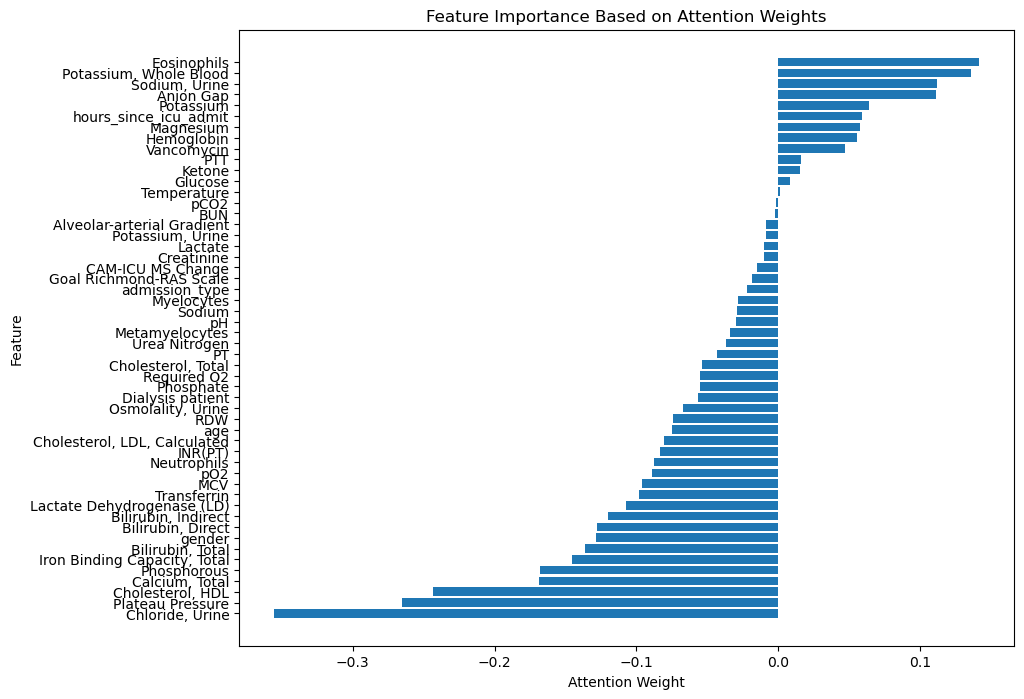

In [46]:
# Example: Assuming X_test is your test dataset
attention_weights = get_attention_weights(model, X_test)

# Visualize the attention weights
# Here we assume `attention_weights` is a numpy array of shape (batch_size, time_steps, features)
# Average across the time steps to get a global feature importance per sample
# Example visualization
average_attention_weights = np.mean(attention_weights, axis=1)  # Average across time steps

# Display attention weights for a sample
# For visualization, here we show the first sample's attention weights
feature_columns = ['gender', 'age', 'Plateau Pressure','admission_type', 'BUN', 'PTT', 'Phosphorous', 'Dialysis patient',
                   'Goal Richmond-RAS Scale', 'CAM-ICU MS Change', 'Alveolar-arterial Gradient',
                   'Hemoglobin', 'Lactate', 'pCO2', 'pH', 'pO2', 'Potassium, Whole Blood',
                   'Required O2', 'Temperature', 'Anion Gap', 'Bilirubin, Direct', 'Bilirubin, Indirect',
                   'Bilirubin, Total', 'Calcium, Total', 'Cholesterol, HDL', 'Cholesterol, LDL, Calculated',
                   'Cholesterol, Total', 'Creatinine', 'Iron Binding Capacity, Total', 'Lactate Dehydrogenase (LD)',
                   'Magnesium', 'Phosphate', 'Potassium', 'Sodium', 'Transferrin', 'Urea Nitrogen',
                   'Vancomycin', 'Chloride, Urine', 'Osmolality, Urine', 'Potassium, Urine',
                   'Sodium, Urine', 'Eosinophils', 'INR(PT)', 'MCV', 'Metamyelocytes', 'Myelocytes',
                   'Neutrophils', 'PT', 'RDW', 'Glucose', 'Ketone','hours_since_icu_admit']  # List of features
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Attention Weight': average_attention_weights[0]  # Assuming we take the first sample
})

# Sort the features by attention weight (descending order)
feature_importance = feature_importance.sort_values(by='Attention Weight', ascending=False)

# Display the ranked features
print("Ranked Features based on Attention Weights:")
print(feature_importance)

# Optionally, visualize the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Attention Weight'])
plt.xlabel('Attention Weight')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Attention Weights')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()


In [23]:
# model.save('lstm_transformer_model_50epoch.h5')

In [35]:
# Step 3: Evaluate the model
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')


122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
Precision: 0.80
Recall: 0.70
F1 Score: 0.75
Accuracy: 0.81


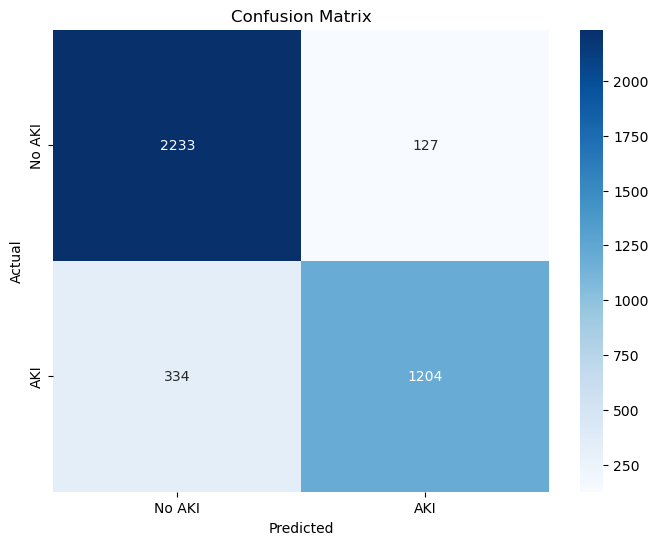

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AKI', 'AKI'], yticklabels=['No AKI', 'AKI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

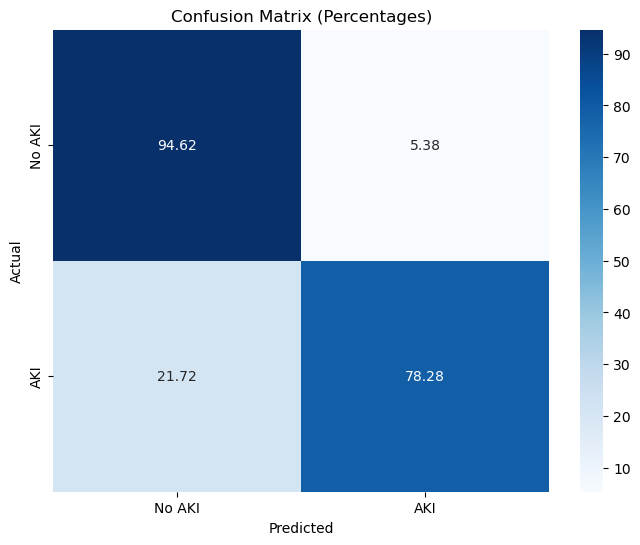

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot Confusion Matrix as percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No AKI', 'AKI'], yticklabels=['No AKI', 'AKI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.show()

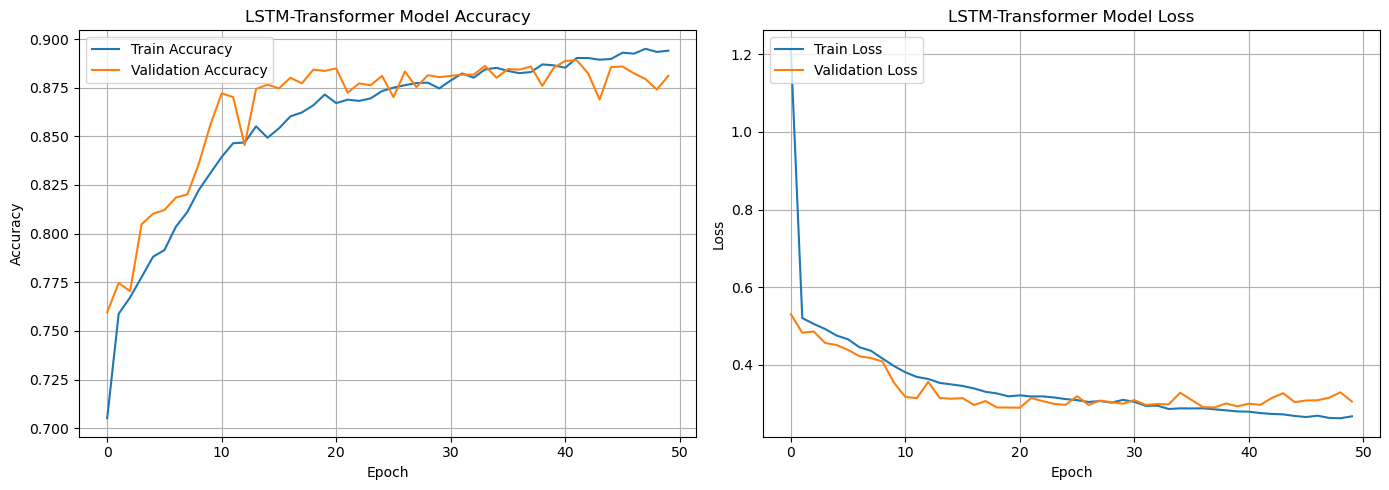

In [19]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM-Transformer Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM-Transformer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()


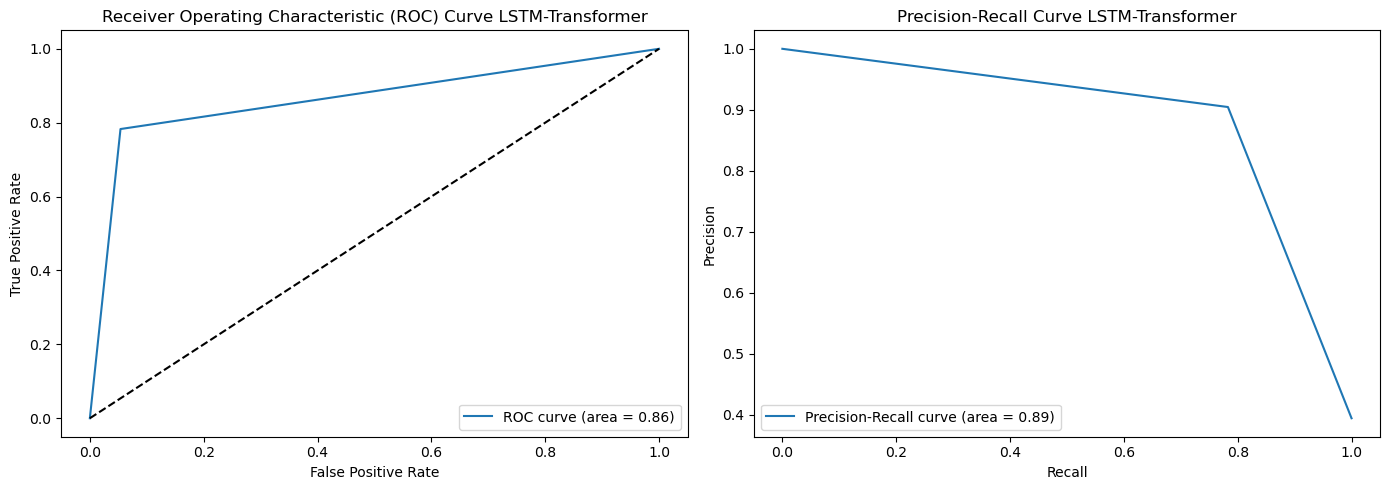

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Assuming y_true are the true labels and y_scores are the predicted probabilities

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)

# Calculate Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve LSTM-Transformer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auprc)
plt.title('Precision-Recall Curve LSTM-Transformer')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

C:\Users\SAIFUL_BADHON\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']
  warnings.warn(


TypeError: Invalid shape (48,) for image data

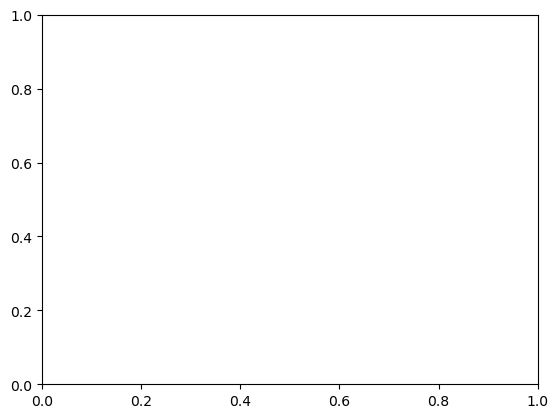

In [34]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
import matplotlib.pyplot as plt

# Define a loss function that explains which class to visualize
def loss(output):
    return output[:, 0]  # Target the first output (binary classification)

# Instantiate Saliency object
saliency = Saliency(model, model_modifier=ReplaceToLinear())

# Generate saliency map
saliency_map = saliency(loss, X_train[0:1])  # Visualize first sample

# Plot feature importance across time steps
plt.imshow(saliency_map[0], cmap='viridis', aspect='auto')
plt.title("Feature Importance across Time Steps")
plt.colorbar()
plt.show()
